# Código do P.I.C
## Aprendizado de máquina
### Predição de valores

Quando estamos trabalhando compemrpesas de pequeno porte que adoram o simples nacional, temos que considerar os seguintes gastos operacionais:

- Simples nacional 
- IPTU 
- IPVA 
- Luz 
- Água e esgoto 
- 10 Funcionários 
- Contador 
- Internet e telefone 
- Risco de perda 
- Taxa de débito 
- Taxa de crédito 
- Adubo 

Ao todos essas podem ser consdieradas as despesas minimas da empresa. Lógico que ainda podem existir mais, contudo, iremos trabalhar a partir destas.

In [3]:
def calcular_taxa_real_simples_nacional(RBT12):
    # Defina as faixas de renda, taxas percentuais e parcelas dedutíveis
    faixas = [
        (180000.00, 0.04, 0),  # Faixa 1: até R$ 180.000,00 - 4%
        (360000.00, 0.073, 5940.00), # Faixa 2: até R$ 360.000,00 - 7.3%
        (720000.00, 0.095, 13860.00), # Faixa 3: até R$ 720.000,00 - 9.5%
        (1800000.00, 0.1070, 22500.00), # Faixa 4: até R$ 1.800.000,00 - 10.7%
        (3600000.00, 0.1430, 87300.00), # Faixa 5: até R$ 3.600.000,00 - 14.3%
        (4800000.00, 0.19, 378000.00) # Faixa 6: até R$ 4.800.000,00 - 19%
    ]
    
    # Calcule a taxa real com base na receita bruta total dos últimos 12 meses (RBT12)
    taxa_real = 0
    for limite, taxa, pd in faixas:
        if RBT12 <= limite:
            taxa_real = (RBT12 * taxa - pd) / RBT12
            break
    
    return taxa_real

# Solicite ao usuário que insira a receita bruta total dos últimos 12 meses
RBT12_usuario = float(input("Por favor, insira a receita bruta total dos últimos 12 meses (RBT12): R$ "))
taxa_real_calculada = calcular_taxa_real_simples_nacional(RBT12_usuario)
print(f"A Taxa Real do Simples Nacional para a receita bruta de R$ {RBT12_usuario} é de {taxa_real_calculada:.2%}")


A Taxa Real do Simples Nacional para a receita bruta de R$ 1200000.0 é de 8.82%


Como o simples nacional é uma cota unica com a junção de todos os tributos, seu percentual já engloba todos os tributos relatios a comercialização de produtos. 

O proximo tributo a ser calculado não precisa necessariamente de calculo, pois o governo já oferece o resultado dos calculos por metro quadrado. Trata-se do IPTU, que precisa ser comparado com o lucro total do mes para saber o quanto equivale da despesa

In [6]:
# Solicite ao usuário que insira o IPTU
IPTU_usuario = float(input("Por favor, insira o valor do seu IPTU: R$ "))
porcentagem_iptu = (IPTU_usuario / RBT12_usuario) * 100

print(f"A porcentagem do IPTU em relação ao RBT12 é de {porcentagem_iptu:.2f}%")

A porcentagem do IPTU em relação ao RBT12 é de 18.00%


A mesma coisa vale para o IPVA


In [ ]:
# Solicite ao usuário que insira o IPVA
IPVA_usuario = float(input("Por favor, insira o valor do seu IPVA: R$ "))
porcentagem_iptu = (IPVA_usuario / RBT12_usuario) * 100

print(f"A porcentagem do IPVA em relação ao RBT12 é de {porcentagem_iptu:.2f}%")

Agora vamos passar para o calculo da agua e seu consumo

Aqui está como o cálculo seria feito:

- Tarifa Fixa: R$ 24,31
- Consumo de Água:
- Primeiros 4m³: 4m³ x R$ 7,07 = R$ 28,28
- Próximos 3m³ (5 a 7m³): 3m³ x R$ 8,83 = R$ 26,49
- Próximos 3m³ (8 a 10m³): 3m³ x R$ 11,39 = R$ 34,17
- Próximos 30m³ (11 a 40m³): 30m³ x R$ 14,12 = R$ 423,60
- Consumo acima de 40m³: 10m³ x R$ 16,66 = R$ 166,60
- Total do Consumo de Água: R$ 28,28 + R$ 26,49 + R$ 34,17 + R$ 423,60 + R$ 166,60 = R$ 679,14
- Total Geral da Conta de Água: Tarifa Fixa + Total do Consumo de Água = R$ 24,31 + R$ 679,14 = R$ 703,45


Este é apenas um exemplo e o valor real dependerá do consumo exato de água.

In [ ]:
# Tarifas de água não residencial
tarifa_fixa = 24.31
faixas_consumo = [(0, 4, 7.07), (5, 7, 8.83), (8, 10, 11.39), (11, 40, 14.12), (41, float('inf'), 16.66)]

# Função para calcular a conta de água
def calcular_conta_agua(consumo):
    total = tarifa_fixa
    for faixa in faixas_consumo:
        inicio, fim, preco = faixa
        if consumo > inicio:
            total += min(consumo, fim) - inicio * preco
            consumo -= fim - inicio
    return total

# Solicitação de entrada do usuário
consumo_usuario = float(input("Digite o consumo de água em m³: "))

# Cálculo e exibição do resultado
total_conta = calcular_conta_agua(consumo_usuario)
print(f"O valor total da conta de água é: R$ {total_conta:.2f}")

Passando para a conta de luz, segundo as normativas da Neo Energia, do Distrito Federal, temos o seguinte calculo:

In [ ]:
def calcular_custo_energia(valor_conta_luz, consumo_kwh):
    # Constantes com as porcentagens dos impostos e taxas
    TAXA_ILUMINACAO_PUBLICA = 0.1215
    ICMS = 0.20
    PIS = 0.0029
    COFINS = 0.0135

    # Calcula o valor total de taxas e impostos
    valor_taxas_impostos = valor_conta_luz * (TAXA_ILUMINACAO_PUBLICA + ICMS + PIS + COFINS)

    # Calcula o custo efetivo do kWh
    custo_efetivo_kwh = (valor_conta_luz - valor_taxas_impostos) / consumo_kwh

    # Calcula o gasto diário
    gasto_diario = valor_conta_luz / 30

    # Calcula o gasto por hora
    gasto_por_hora = gasto_diario / 24

    # Calcula o gasto por minuto
    gasto_por_minuto = gasto_por_hora / 60

    # Calcula o gasto médio por caixa, assumindo 3,23 minutos por caixa
    gasto_por_caixa = 3.23 * gasto_por_minuto

    # Calcula a porcentagem do gasto da conta de luz em relação às despesas da empresa
    porcentagem_gasto_luz = (valor_conta_luz / RBT12_usuario) * 100

    # Imprime os resultados
    print(f"Custo efetivo por kWh: R${custo_efetivo_kwh:.2f}")
    print(f"Gasto diário: R${gasto_diario:.2f}")
    print(f"Gasto por hora: R${gasto_por_hora:.2f}")
    print(f"Gasto por minuto: R${gasto_por_minuto:.2f}")
    print(f"Gasto por caixa: R${gasto_por_caixa:.2f}")
    print(f"Porcentagem do gasto da conta de luz em relação às despesas da empresa: {porcentagem_gasto_luz:.2f}%")

# Exemplo de uso da função
valor_conta_luz = float(input("Digite o valor da conta de luz: R$"))
consumo_kwh = float(input("Digite o total consumido em kWh: "))

calcular_custo_energia(valor_conta_luz, consumo_kwh)


In [ ]:
def calcular_custo_final(salario_base, vale_transporte):
    # Constantes
    FGTS_SALARIO = 0.08
    DECIMO_TERCEIRO_PROP = 1/12
    FERIAS_PROP = 1/12
    TERCO_FERIAS = 1/3
    FGTS_FERIAS_PROV = 0.08 * FERIAS_PROP
    FGTS_DECIMO_TERCEIRO_PROV = 0.08 * DECIMO_TERCEIRO_PROP
    INSS_PATRONAL = 0.03
    INSS_PATRONAL_PROV = 0.03 * (DECIMO_TERCEIRO_PROP + FERIAS_PROP + TERCO_FERIAS)
    
    # Cálculos
    fgts_salario = salario_base * FGTS_SALARIO
    decimo_terceiro_prop = salario_base * DECIMO_TERCEIRO_PROP
    ferias_prop = salario_base * FERIAS_PROP
    terco_ferias = ferias_prop * TERCO_FERIAS
    fgts_ferias_prov = salario_base * FGTS_FERIAS_PROV
    fgts_decimo_terceiro_prov = salario_base * FGTS_DECIMO_TERCEIRO_PROV
    inss_patronal = salario_base * INSS_PATRONAL
    inss_patronal_prov = salario_base * INSS_PATRONAL_PROV
    
    custo_total = (salario_base + fgts_salario + decimo_terceiro_prop + ferias_prop +
                   terco_ferias + fgts_ferias_prov + fgts_decimo_terceiro_prov +
                   inss_patronal + inss_patronal_prov)
    
    # Descontos
    desconto_vale_transporte = vale_transporte
    desconto_inss = salario_base * 0.09  # Considerando a alíquota de 9% para o exemplo
    
    custo_final = custo_total - desconto_vale_transporte - desconto_inss
    
    return custo_final

# Exemplo de uso da função
salario_base = float(input("Digite o salário base do funcionário: R$"))
vale_transporte = float(input("Digite o valor do vale-transporte: R$"))

custo_final = calcular_custo_final(salario_base, vale_transporte)
print(f"O custo final após os descontos é: R${custo_final:.2f}")


In [ ]:
def calcular_custo_por_minuto(custo_mensal, horas_semanais=40):
    # Calcula o número de semanas em um mês
    semanas_por_mes = 4.33
    
    # Calcula o número total de horas trabalhadas por mês
    horas_por_mes = horas_semanais * semanas_por_mes
    
    # Converte horas em minutos
    minutos_por_mes = horas_por_mes * 60
    
    # Calcula o custo por minuto
    custo_por_minuto = custo_mensal / minutos_por_mes
    
    return custo_por_minuto

# Exemplo de uso da função
custo_mensal = float(input("Digite o custo mensal do funcionário: R$"))
custo_por_minuto = calcular_custo_por_minuto(custo_mensal)

print(f"O custo por minuto do funcionário é: R${custo_por_minuto:.2f}")

O contador aprensentou-se como um custo fixo que não seria necessário nenhuma função para seu calculo, apenas adicionar o custo ao final. 
Para calcular o custo da hora trabalhada de um funcionário, você pode usar a seguinte fórmula:

$$ \text{Custo da Hora Trabalhada} = \frac{\text{Salário Mensal}}{\text{Total de Horas Trabalhadas no Mês}} $$

Considerando que o funcionário trabalha **8 horas diárias** e **40 horas semanais**, ele trabalha um total de **40 horas** por semana. Para calcular o total de horas trabalhadas no mês, multiplicamos as horas semanais pelo número médio de semanas em um mês:

$$ \text{Total de Horas Trabalhadas no Mês} = 40 \text{ horas/semana} \times 4,33 \text{ semanas/mês} $$

$$ \text{Total de Horas Trabalhadas no Mês} = 173,2 \text{ horas/mês} $$

Agora, usando o salário mensal do funcionário de **R$ 4559,75**, o cálculo seria:

$$ \text{Custo da Hora Trabalhada} = \frac{4559,75}{173,2} $$

Portanto, o custo aproximado da hora trabalhada desse funcionário é de **R$ 26,34**.




O mesmo tambem se aplica as outras despesas:
- Internet e telefone - O pacote da TIM para serviços de banda larga está custando um valor de R$ 138,94 (cento e trinta e oito reais e noventa e quatro centavos) e para as linhas moveis a operadora Claro com o plano mais vendido está o equivalente a R$ 64,99 (sessenta e quatro reais e noventa e nove centavos). Essas despesas juntas ao mês equivalem a um total de R$ 203,93(duzentos e três reais e noventa e três centavos), o que daria um custo diário de R$ 6,80 (seis reais e oitenta centavos).


- Risco de perda - 2,22% ao dia


In [1]:
# Quantidade total inicial de plantas
total_plantas = 15

# Quantidade de perda em um período específico (1 planta a cada 3 dias)
perda = 1

# Cálculo do percentual de perda
percentual_perda = (perda / total_plantas) * 100

print(f"O percentual de perda é de aproximadamente {percentual_perda:.2f}% a cada 3 dias.")


O percentual de perda é de aproximadamente 6.67% a cada 3 dias.


Ao decidir qual máquina de cartão é mais adequada para seu MEI, leve em consideração quatro tipos de taxas:

•	Taxa de débito.
•	Taxa de crédito.
•	Taxa de crédito parcelado.
•	Taxa de antecipação, caso opte por receber os valores antes do prazo.

Marcas com políticas de tarifação mais transparentes tendem a ser mais fáceis de comparar durante a compra e de administrar no cotidiano.Tomemos como exemplo as taxas oferecidas pela Maquininha de Cartão MEI Fácil:

•	Taxa de débito: 0,99% (a mais vantajosa no mercado para MEIs).
•	Taxa de crédito antecipado (depósito em até 1 dia útil): 4,29%.
•	Taxa de crédito parcelado antecipado (depósito em até 1 dia útil): 4,29% + 1,60% por parcela.
•	Taxa de crédito (depósito em 30 dias): 3,11%.
•	Taxa de crédito parcelado (depósito em 30 dias): 3,90% por parcela.

Pesquisar amplamente é crucial para garantir a escolha da máquina com as menores taxas para o CNPJ MEI . E essas percentagens têm que ser adicionadas ao final do preço somada a outro fator que seria o imposto de comercialização. 

# Análise dos dados

In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [43]:
df = pd.read_excel("DADOS GERAIS.xlsx")

In [44]:
df.head()

,ID. PLANTA,DIA,CRESCIMENTO,SOL,AGUA,FOLHA,QUALIDADE,DETALHE 1,DETALHE 2,ADUBO,VIGOR,COR,FLOR,QUALIDADE FLOR,PERCA DE MATERIAL,GANHO
0,1,1,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE,SIM,PERFEITA,0,0
1,1,2,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
2,1,3,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
3,1,4,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
4,1,5,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,1,0


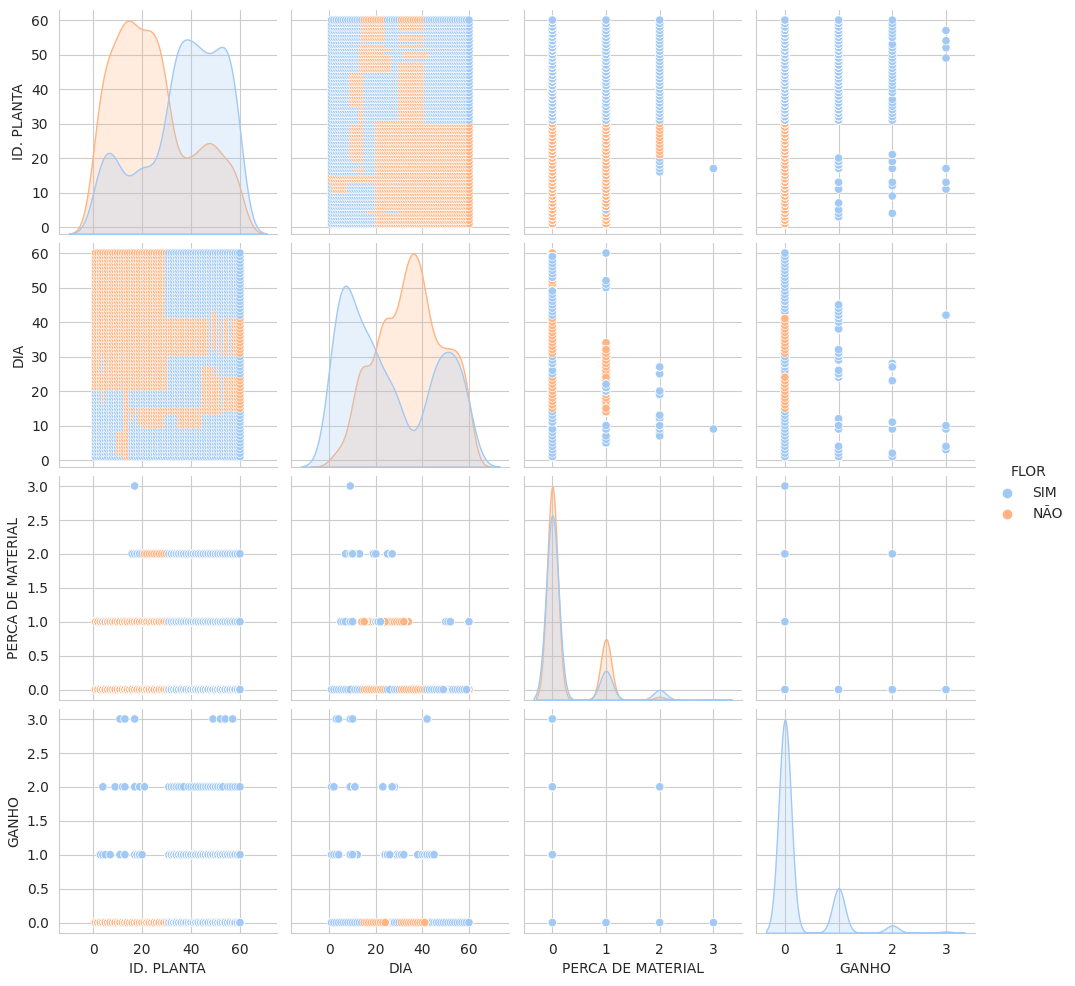

In [45]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="FLOR", palette="pastel")

Nos gráficos podemos observar que há uma relativa distribuição equanime sobre a quantidade de flores (se houve ou não). Isso se deve ao fato de que boa parte do tempo houve uma maioria das plantas com flores, tendo variado a recuperação da floração conforme as condições expostas de cada conjunto de plantas. Aquelas que tiveram exposição total ao sol somada a uma adubação (ainda que em dobro da recomendada pelo fabricante) tiveram uma recuperação da floração posterior por isso no dia temos uma separação bem definida, ainda que contenham alguns intervalos de alguns com flores (caracterizando os outliers). 

In [46]:
df.isna().sum() / len(df)

ID. PLANTA           0.000000
DIA                  0.000000
CRESCIMENTO          0.000000
SOL                  0.000000
AGUA                 0.029167
FOLHA                0.000000
QUALIDADE            0.000000
DETALHE 1            0.000000
DETALHE 2            0.000000
ADUBO                0.000000
VIGOR                0.000000
COR                  0.000000
FLOR                 0.000000
QUALIDADE FLOR       0.000000
PERCA DE MATERIAL    0.000000
GANHO                0.000000
dtype: float64

In [47]:
df['AGUA'].unique()

array(['40 ML', '0 ML', '1 ML', '2 ML', '3 ML', '4 ML', '5 ML', nan],
      dtype=object)

Temos aqui na verdade dois valores. por uma equivoco no preenchimento dos dados, os valores de 1 a 5 são variações de 0 ML, ou seja, representa aqueles dias em que não teve agua. O outro valor seria os 40 ML que se manteve padrão em boa parte dos dias. 

Já que são somente dois valores: com e sem agua, vou normalizar entre 0 e 1, sendo o o 40 equiparado a 1 neste momento

In [48]:
df['AGUA'] = df['AGUA'].fillna('0')
df['AGUA'] = df['AGUA'].replace('0 ML', '0')
df['AGUA'] = df['AGUA'].replace('1 ML', '0')
df['AGUA'] = df['AGUA'].replace('2 ML', '0')
df['AGUA'] = df['AGUA'].replace('3 ML', '0')
df['AGUA'] = df['AGUA'].replace('4 ML', '0')
df['AGUA'] = df['AGUA'].replace('5 ML', '0')
df['AGUA'] = df['AGUA'].replace('40 ML', '1')



In [53]:
df.dtypes

ID. PLANTA            int64
DIA                   int64
CRESCIMENTO           int32
SOL                   int32
AGUA                  int32
FOLHA                object
QUALIDADE            object
DETALHE 1            object
DETALHE 2            object
ADUBO                 int32
VIGOR                object
COR                  object
FLOR                  int32
QUALIDADE FLOR       object
PERCA DE MATERIAL     int64
GANHO                 int64
dtype: object

In [50]:
df['AGUA'] = df['AGUA'].astype(int)

O que será feito aqui é aproveitar as colunas que tem somente duas variações:
- crescimento: com ou sem
- sol: pleno ou meio sol
- adubo: com ou sem
- flor: sim ou não

In [52]:
le = LabelEncoder()
colunas = ['CRESCIMENTO', 'SOL', 'ADUBO', 'FLOR']
for coluna in colunas:
    df[coluna] = le.fit_transform(df[coluna])


Agora vamos mapear os imperativos que não são com somente duas. 

A onda de luz é uma onda eletromagnética transversa (lado a lado), em que os campos  magnético e elétrico oscilam perpendicularmente à dire-  ção da propagação da onda e a um ângulo de 90o uma em  relação à outra.  A luz é também uma partícula, denominada fóton.  Cada fóton contém uma quantidade de energia que é chamada de quantum (plural: quanta). O conteúdo de energia da luz não é contínuo, mas emitido em “pacotes” discretos, os quanta. A energia (E) de um fóton depende da  frequência, de acordo com a relação conhecida como a lei  de Planck:  E = hν (7.2)  onde h é a constante de Planck (6,626 × 10–34 J s).  A luz solar é como uma chuva de fótons de diferentes frequências.

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 172). Edição do Kindle. 

A clorofila parece verde ao olho humano porque ela absorve luz principalmente nas porções vermelha e azul do espectro. Desse modo, apenas uma parte da luz enriquecida  nos comprimentos de onda do verde (cerca de 550 nm) é  refletida para o olho humano

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 173). Edição do Kindle. 

A absorção da luz é representada pela Equação 7.3, na  qual a clorofila (Chl) em seu estado mais baixo de energia,  ou estado de base, absorve um fóton (representado por hν)  e faz a transição para um estado de maior energia, ou estado excitado 

(Chl*):  Chl + hν → Chl* (7.3)  

A distribuição de elétrons na molécula excitada é,  de certa forma, diferente da distribuição na molécula em  estado-base (Figura 7.5). A absorção da luz azul excita a  clorofila a um estado energético mais elevado do que a absorção de luz vermelha, pois a energia dos fótons é maior  quando seus comprimentos de onda são mais curtos. No  estado de maior excitação, a clorofila é extremamente instável; ela rapidamente libera parte de sua energia ao meio  como calor, entrando em um estado de menor excitação,  no qual pode permanecer estável por um máximo de alguns nanossegundos (10–9 s). Devido à instabilidade inerente do estado excitado, qualquer processo que capture  sua energia deve ser extremamente rápido.  No estado de menor excitação, a clorofila

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 173). Edição do Kindle. 

Podemos dizer que o controle da luminosidade é umd os fatores que interfere na coloração da planta. Assim como a falta de nutrientes, a indicação de mudança no tom da folha indica alguma anormalidade do estado ideal de cada espécie vegetal. Para padronizar o teste: verde é o tom ideal, os demais apresentam algum desbalanceamento na iluminação ou na agua ou no solo. 

Verde escuro - foi notado um padrão de tonalidade mais escura para aquelas que não receberam sol pleno

Amarela - alem da questão da falta de sol, temos um padrão de falta de reequilibrio do solo por falta de adubo

Marrom - pela falta de exposição solar, pode indicar um excesso de agua, já que foi possivel notar mais no final dos dias de observação

Preta - estava morta

In [54]:
df['FOLHA'].unique()

array(['VERDE', 'VERDE ESCURO', 'AMARELA', 'MARROM', 'PRETA'],
      dtype=object)

In [ ]:
penguim.loc[penguim['island'] == 'Biscoe', 'island_nom'] = 0
penguim.loc[penguim['island'] == 'Dream', 'island_nom'] = 1
penguim.loc[penguim['island'] == 'Torgersen', 'island_nom'] = 2